In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import geopandas as gpd

## Banco de dados 

In [17]:
chuva_df = pd.read_csv("chuva.csv").drop_duplicates(['Dia', 'Mês', 'Ano', 'EstacaoCodigo']).reset_index(drop=True)
map_biomas = pd.read_csv("MapBiomas - Tabela de Dados.csv")
date_strings = chuva_df['Dia'].astype(str) + '/' + chuva_df['Mês'].astype(str) + '/' + chuva_df['Ano'].astype(str)
chuva_df['Data'] = date_strings

In [28]:
chuva_df

,EstacaoCodigo,Dia,Mês,Ano,Nome,Chuva,Latitude,Longitude,MediaPrecAno,MaximaPrecAnual,MinimoPrecAnual,MediaDiasChuvaAno,MaximaDiasChuvaAno,MinimaDiasChuvaAno,Data
0,737006,1,9,2022,PIANCÓ,NaN,-7.2142,-37.9258,1.910959,70,0,4.125000,15,0,1/9/2022
1,737006,2,9,2022,PIANCÓ,0.0,-7.2142,-37.9258,1.910959,70,0,4.125000,15,0,2/9/2022
2,737006,3,9,2022,PIANCÓ,0.0,-7.2142,-37.9258,1.910959,70,0,4.125000,15,0,3/9/2022
3,737006,4,9,2022,PIANCÓ,0.0,-7.2142,-37.9258,1.910959,70,0,4.125000,15,0,4/9/2022
4,737006,5,9,2022,PIANCÓ,0.0,-7.2142,-37.9258,1.910959,70,0,4.125000,15,0,5/9/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319698,738080,27,12,2004,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.520790,238,0,3.655405,32,0,27/12/2004
319699,738080,28,12,2004,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.520790,238,0,3.655405,32,0,28/12/2004
319700,738080,29,12,2004,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.520790,238,0,3.655405,32,0,29/12/2004
319701,738080,30,12,2004,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.520790,238,0,3.655405,32,0,30/12/2004


In [50]:
df_geo = gpd.GeoDataFrame(chuva_df, geometry = gpd.points_from_xy(chuva_df.Latitude, chuva_df.Longitude))

In [43]:
world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query("continent == 'South America'")

/tmp/ipykernel_3296/3210492712.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).query("continent == 'South America'")


In [ ]:
m = folium.Map(location=[chuva_df.Latitude.mean(), chuva_df.Longitude.

<Axes: >

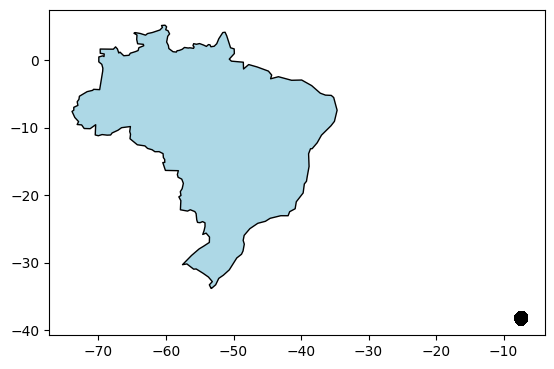

In [55]:
axis = world_data.query("name == 'Brazil'").plot(color="lightblue", edgecolor="black")
df_geo.plot(ax=axis, color="black")

In [47]:
axis

<Axes: >

In [18]:
map_biomas = map_biomas.melt(id_vars=["Classe"], var_name=["Ano"], value_name="Hectares").astype({"Ano": int}).reset_index(drop=True)

In [26]:
df_completo.Classe.unique()

array(['1. Floresta', '1.1. Formação Florestal', '1.2. Formação Savânica',
       '1.3. Mangue', '1.4. Restinga Arborizada (beta)',
       '2. Formação Natural não Florestal',
       '2.1. Campo Alagado e Área Pantanosa', '2.2. Formação Campestre',
       '2.3. Apicum', '2.4. Afloramento Rochoso',
       '2.5. Restinga Herbácea/Arbustiva',
       '2.6. Outras Formações não Florestais', '3. Agropecuária',
       '3.1. Pastagem', '3.2. Agricultura', '3.2.1. Lavoura Temporária',
       '3.2.1.1. Soja', '3.2.1.2. Cana', '3.2.1.3. Arroz (beta)',
       '3.2.1.4. Algodão (beta)', '3.2.1.5. Outras Lavouras Temporárias',
       '3.2.2. Lavoura Perene', '3.2.2.1. Café (beta)',
       '3.2.2.2. Citrus (beta)', '3.2.2.3. Outras Lavouras Perenes',
       '3.3. Silvicultura (monocultura)', '3.4. Mosaico de Usos',
       '4. Área não Vegetada', '4.1. Praia, Duna e Areal',
       '4.2. Área Urbanizada', '4.3. Mineração',
       '4.4. Outras Áreas não Vegetadas', '5. Corpo D`água',
       '5.1. Rio, L

In [ ]:
df_completo.query("

In [19]:
df_completo = map_biomas.merge(chuva_df, how="inner", on="Ano")

In [5]:
# df_completo = df_completo.query("Ano in [2008, 2010, 2014]").reset_index(drop=True)

In [22]:
len(df_completo.MaximaPrecAnual.unique())

33

<Axes: xlabel='Ano', ylabel='MaximaPrecAnual'>

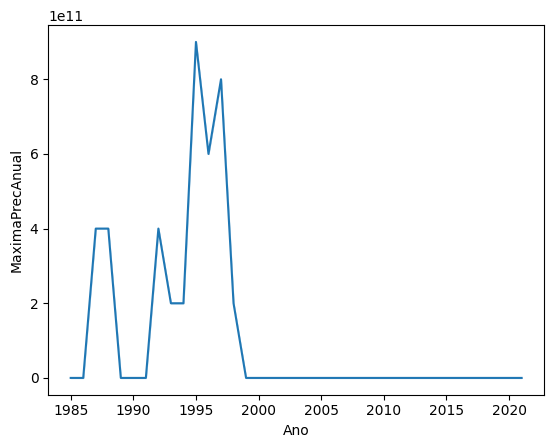

In [24]:
sns.lineplot(data=df_completo, x="Ano", y="MaximaPrecAnual")

In [4]:
chuva_df.select_dtypes(include=[np.number]).query('Ano == 2014').groupby(['Mês', 'EstacaoCodigo'], as_index=False).mean().sort_values("Chuva", ascending=False)

,Mês,EstacaoCodigo,Dia,Ano,Chuva,Latitude,Longitude,MediaPrecAno,MaximaPrecAnual,MinimoPrecAnual,MediaDiasChuvaAno,MaximaDiasChuvaAno,MinimaDiasChuvaAno
39,3,738080,16.0,2014.0,5.965517,-7.7417,-38.0992,1.0,150.0,0.0,3.104294,15.0,0.0
27,3,737059,16.0,2014.0,5.448276,-7.6344,-37.8769,1.0,150.0,0.0,3.104294,15.0,0.0
51,4,738078,16.0,2014.0,5.103448,-7.5167,-38.1792,1.0,150.0,0.0,3.104294,15.0,0.0
26,3,737006,16.0,2014.0,4.900000,-7.2142,-37.9258,1.0,150.0,0.0,3.104294,15.0,0.0
36,3,738077,16.0,2014.0,4.551724,-7.5383,-38.1992,1.0,150.0,0.0,3.104294,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,9,738076,16.0,2014.0,0.000000,-7.6253,-38.5569,1.0,150.0,0.0,3.104294,15.0,0.0
120,9,738077,16.0,2014.0,0.000000,-7.5383,-38.1992,1.0,150.0,0.0,3.104294,15.0,0.0
121,9,738078,16.0,2014.0,0.000000,-7.5167,-38.1792,1.0,150.0,0.0,3.104294,15.0,0.0
122,9,738079,16.0,2014.0,0.000000,-7.5503,-38.3353,1.0,150.0,0.0,3.104294,15.0,0.0


In [5]:
chuva_df.select_dtypes(include=[np.number]).query('Ano == 2010').groupby(['Mês', 'EstacaoCodigo'], as_index=False).mean().sort_values("Chuva", ascending=False)

,Mês,EstacaoCodigo,Dia,Ano,Chuva,Latitude,Longitude,MediaPrecAno,MaximaPrecAnual,MinimoPrecAnual,MediaDiasChuvaAno,MaximaDiasChuvaAno,MinimaDiasChuvaAno
42,4,737059,16.0,2010.0,8.689655,-7.6344,-37.8769,1.165194,93.0,0.0,3.197605,18.0,0.0
162,12,738076,16.0,2010.0,6.827586,-7.6253,-38.5569,1.165194,93.0,0.0,3.197605,18.0,0.0
7,1,738075,16.0,2010.0,6.724138,-7.4167,-38.0667,1.165194,93.0,0.0,3.197605,18.0,0.0
50,4,738076,16.0,2010.0,6.655172,-7.6253,-38.5569,1.165194,93.0,0.0,3.197605,18.0,0.0
163,12,738077,16.0,2010.0,6.344828,-7.5383,-38.1992,1.165194,93.0,0.0,3.197605,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,8,738079,16.0,2010.0,0.000000,-7.5503,-38.3353,1.165194,93.0,0.0,3.197605,18.0,0.0
108,8,738078,16.0,2010.0,0.000000,-7.5167,-38.1792,1.165194,93.0,0.0,3.197605,18.0,0.0
107,8,738077,16.0,2010.0,0.000000,-7.5383,-38.1992,1.165194,93.0,0.0,3.197605,18.0,0.0
106,8,738076,16.0,2010.0,0.000000,-7.6253,-38.5569,1.165194,93.0,0.0,3.197605,18.0,0.0


In [6]:
chuva_df.select_dtypes(include=[np.number]).query('Ano == 2008').groupby(['Mês', 'EstacaoCodigo'], as_index=False).mean().sort_values("Chuva", ascending=False)

,Mês,EstacaoCodigo,Dia,Ano,Chuva,Latitude,Longitude,MediaPrecAno,MaximaPrecAnual,MinimoPrecAnual,MediaDiasChuvaAno,MaximaDiasChuvaAno,MinimaDiasChuvaAno
55,4,738080,16.0,2008.0,10.344828,-7.7417,-38.0992,1.573563,161.0,0.0,4.141104,18.0,0.0
48,4,738073,16.0,2008.0,9.206897,-7.3639,-38.2053,1.573563,161.0,0.0,4.141104,18.0,0.0
52,4,738077,16.0,2008.0,9.206897,-7.5383,-38.1992,1.573563,161.0,0.0,4.141104,18.0,0.0
59,5,737072,16.0,2008.0,9.000000,-7.7331,-37.9944,1.573563,161.0,0.0,4.141104,18.0,0.0
53,4,738078,16.0,2008.0,8.379310,-7.5167,-38.1792,1.573563,161.0,0.0,4.141104,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,10,737074,16.0,2008.0,0.000000,-7.3833,-37.9897,1.573563,161.0,0.0,4.141104,18.0,0.0
126,10,738058,16.0,2008.0,0.000000,-7.4364,-38.3189,1.573563,161.0,0.0,4.141104,18.0,0.0
127,10,738073,16.0,2008.0,0.000000,-7.3639,-38.2053,1.573563,161.0,0.0,4.141104,18.0,0.0
128,10,738074,16.0,2008.0,0.000000,-7.4228,-38.2661,1.573563,161.0,0.0,4.141104,18.0,0.0


<AxesSubplot: xlabel='Ano', ylabel='Chuva'>

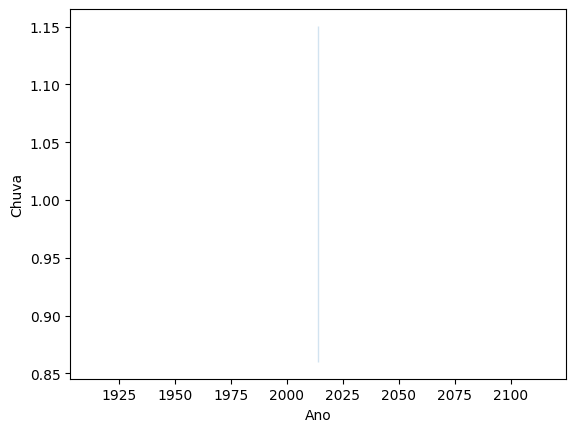

In [7]:
sns.lineplot(data=chuva_df.query('Ano == 2014'), x='Ano', y='Chuva')

In [8]:
# chuva_df.query('Ano == 2014').max('Chuva')

In [9]:
# sns.lineplot(data=chuva_df.query('Ano == 2014'), 

<AxesSubplot: xlabel='Chuva', ylabel='Mês'>

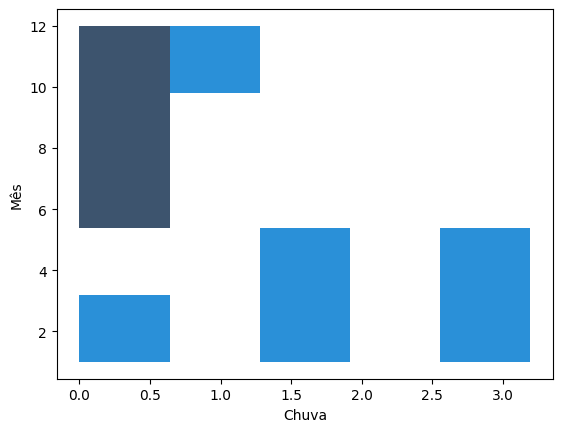

In [10]:
sns.histplot(data=chuva_df.select_dtypes(include=[np.number]).query('Ano == 2014').groupby('Mês', as_index=False).mean(), y='Mês', x='Chuva')

In [11]:
chuva_df.query('Ano == 2014')

,EstacaoCodigo,Dia,Mês,Ano,Nome,Chuva,Latitude,Longitude,MediaPrecAno,MaximaPrecAnual,MinimoPrecAnual,MediaDiasChuvaAno,MaximaDiasChuvaAno,MinimaDiasChuvaAno,Data
2883,737006,1,12,2014,PIANCÓ,NaN,-7.2142,-37.9258,1.0,150,0,3.104294,15,0,1/12/2014
2884,737006,2,12,2014,PIANCÓ,0.0,-7.2142,-37.9258,1.0,150,0,3.104294,15,0,2/12/2014
2885,737006,3,12,2014,PIANCÓ,0.0,-7.2142,-37.9258,1.0,150,0,3.104294,15,0,3/12/2014
2886,737006,4,12,2014,PIANCÓ,0.0,-7.2142,-37.9258,1.0,150,0,3.104294,15,0,4/12/2014
2887,737006,5,12,2014,PIANCÓ,0.0,-7.2142,-37.9258,1.0,150,0,3.104294,15,0,5/12/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316567,738080,27,1,2014,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.0,150,0,3.104294,15,0,27/1/2014
316568,738080,28,1,2014,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.0,150,0,3.104294,15,0,28/1/2014
316569,738080,29,1,2014,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.0,150,0,3.104294,15,0,29/1/2014
316570,738080,30,1,2014,SÃO JOSÉ DE PRINCESA,0.0,-7.7417,-38.0992,1.0,150,0,3.104294,15,0,30/1/2014


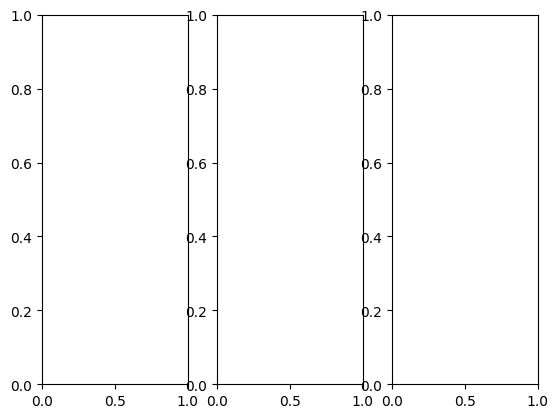

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3)
# anos = [2008, 

In [15]:
# sns.histplot(data=chuva_df[, x='Ano', y='Chuva'

In [16]:
# chuva_df[chuva_df.Ano == 2014].dat